<a href="https://colab.research.google.com/github/gagandeep02/Data-Visualisation/blob/main/focused_attention_visualizations_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Focusing Audience Attention: Preattentive Attributes
## Insurance Dataset — Visual Storytelling Enhancement

You should focus your audience's attention on the most important parts of the previous visuals that you had drawn for your data visualization project. In particular, you should do the following:
- Focus on a few visuals that you had drawn in previous sessions.
- Focus your audience's attention on your story by adding preattentive attributes to the visuals.
- Critically evaluate your design decisions. Why does adding these preattentive attributes improve your visuals?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('insurance.csv')

# Pre-compute shared data
smoker_yes = df[df['smoker'] == 'yes']['bmi']
smoker_no  = df[df['smoker'] == 'no']['bmi']
smoker_avg    = df[df['smoker'] == 'yes'].groupby('age')['expenses'].mean()
nonsmoker_avg = df[df['smoker'] == 'no'].groupby('age')['expenses'].mean()

print('Data loaded. Shape:', df.shape)
df.head()

Data loaded. Shape: (1338, 7)


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


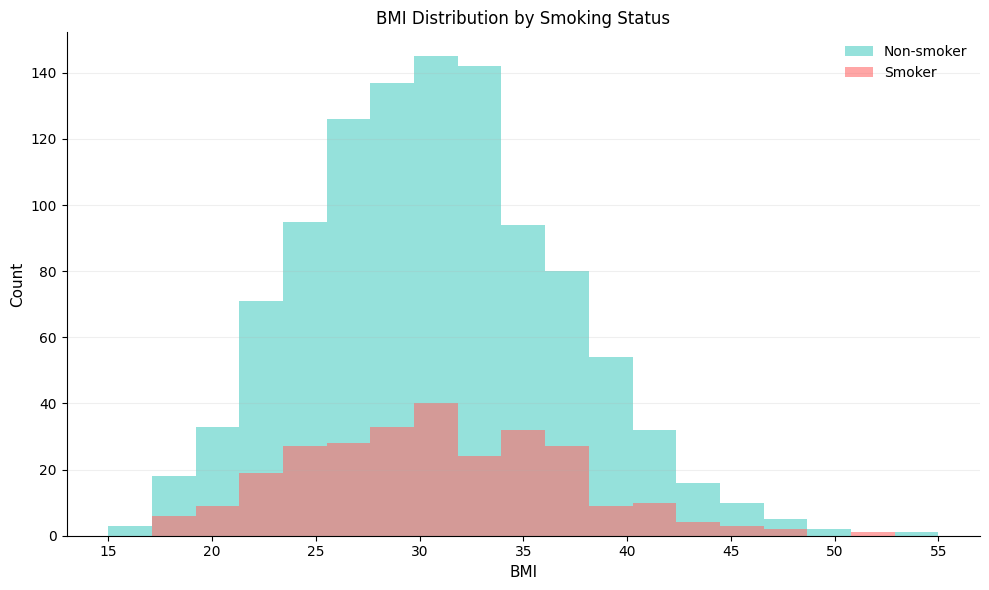

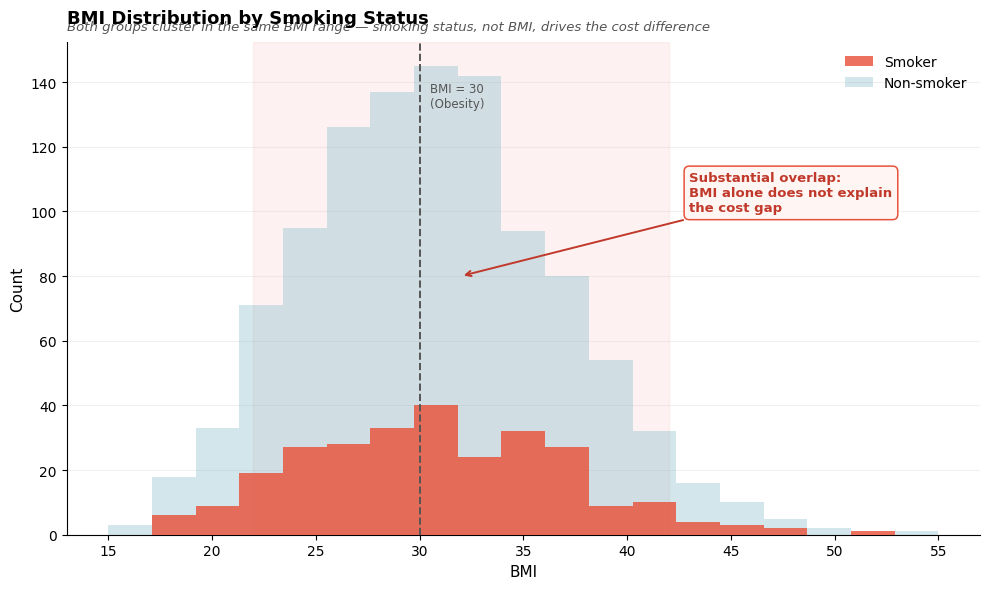

In [4]:
bins = np.linspace(15, 55, 20)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(smoker_no,  bins=bins, alpha=0.6, color='#4ECDC4', label='Non-smoker')
ax.hist(smoker_yes, bins=bins, alpha=0.6, color='#FF6B6B', label='Smoker')
ax.set_xlabel('BMI', fontsize=11)
ax.set_ylabel('Count', fontsize=11)
ax.set_title('BMI Distribution by Smoking Status', fontsize=12)
ax.legend(fontsize=10, frameon=False)
ax.grid(True, alpha=0.2, axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()
#--------
fig, ax = plt.subplots(figsize=(10, 6))

# Non-smoker: muted, low opacity -> background/reference
ax.hist(smoker_no,  bins=bins, alpha=0.35, color='#7EB8C9', label='Non-smoker', zorder=2)
# Smoker: vivid, higher opacity -> foreground, demands attention
ax.hist(smoker_yes, bins=bins, alpha=0.82, color='#E8523A', label='Smoker',     zorder=3)

# Shaded overlap zone — makes the overlap a visible object
ax.axvspan(22, 42, alpha=0.07, color='#E8523A', zorder=1)
ax.annotate(
    'Substantial overlap:\nBMI alone does not explain\nthe cost gap',
    xy=(32, 80), xytext=(43, 100),
    fontsize=9.5, color='#C0392B', fontweight='bold',
    arrowprops=dict(arrowstyle='->', color='#C0392B', lw=1.4),
    bbox=dict(boxstyle='round,pad=0.4', facecolor='#FFF5F3',
              edgecolor='#E8523A', linewidth=1.1)
)

# BMI = 30 reference line (obesity threshold)
ax.axvline(30, color='#555', linewidth=1.4, linestyle='--', zorder=4)
ax.text(30.5, ax.get_ylim()[1] * 0.92, 'BMI = 30\n(Obesity)',
        fontsize=8.5, color='#555', va='top')

# Title + descriptive subtitle
ax.set_title('BMI Distribution by Smoking Status',
             fontsize=13, fontweight='bold', pad=14, loc='left')
ax.text(0.0, 1.025,
        'Both groups cluster in the same BMI range — smoking status, not BMI, drives the cost difference',
        transform=ax.transAxes, fontsize=9.5, color='#555', style='italic')

ax.set_xlabel('BMI', fontsize=11)
ax.set_ylabel('Count', fontsize=11)

legend_handles = [
    mpatches.Patch(facecolor='#E8523A', alpha=0.82, label='Smoker'),
    mpatches.Patch(facecolor='#7EB8C9', alpha=0.35, label='Non-smoker')
]
ax.legend(handles=legend_handles, fontsize=10, frameon=False)
ax.grid(True, alpha=0.18, axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# --------------------------
# Explanation of design decisions:
# Color intensity hierarchy (vivid coral vs. muted grey-blue) creates a clear
#   foreground/background relationship — the audience's visual system processes
#   vivid color first, which is exactly where we want attention.
# Redundant coding (color + opacity together) ensures the hierarchy is clear
#   even for viewers with color vision deficiencies.
# The BMI-30 reference line gives clinical meaning to the axis, letting the
#   audience immediately see that both groups cluster near the overweight range.
# The shaded overlap zone + annotation are inseparable: the zone says 'look here',
#   the annotation says 'here is why'. Together they create a complete narrative moment.
# --------------------------

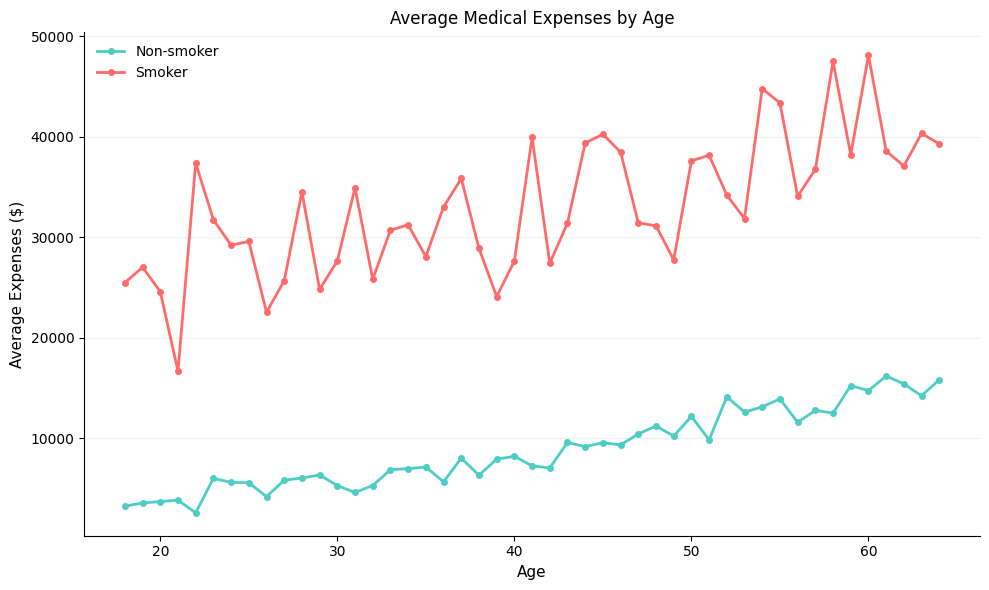

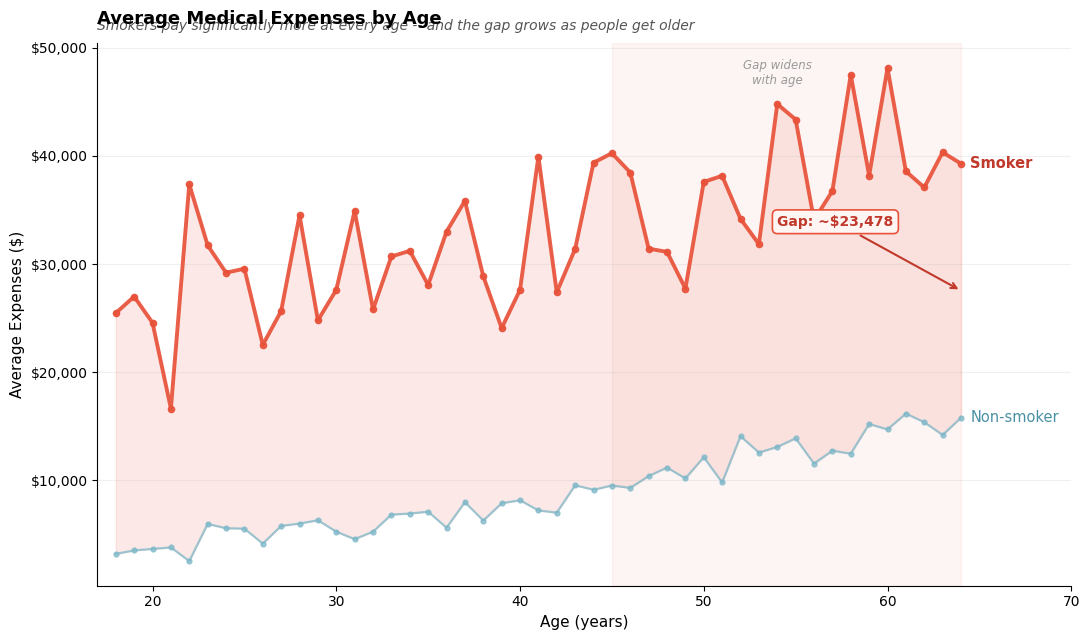

In [7]:
# ===========================================================================
# VISUAL 2: Average Medical Expenses by Age
# Story: Smoking creates a persistent, large cost premium at every age.
# The gap does not narrow as people age — it widens slightly.
# ===========================================================================

# --------------------------
# BASELINE (decluttered, no preattentive focus)
# The gap is visible, but its significance is not communicated.
# --------------------------

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(nonsmoker_avg.index, nonsmoker_avg.values,
        color='#4ECDC4', linewidth=2, marker='o', markersize=4, label='Non-smoker')
ax.plot(smoker_avg.index, smoker_avg.values,
        color='#FF6B6B', linewidth=2, marker='o', markersize=4, label='Smoker')
ax.set_xlabel('Age', fontsize=11)
ax.set_ylabel('Average Expenses ($)', fontsize=11)
ax.set_title('Average Medical Expenses by Age', fontsize=12)
ax.legend(fontsize=10, frameon=False)
ax.grid(True, alpha=0.2, axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# --------------------------
# ENHANCED: Preattentive Attributes Applied
# Drawing audience's attention:
# Color intensity – Non-smokers: muted blue (background/reference);
#                   Smokers: vivid coral (foreground, demands attention).
# Line weight – Smoker line 2.8pt vs. non-smoker 1.6pt;
#               thickness encodes importance — the eye follows the heavier line first.
# Filled region (enclosure) – Semi-transparent band between the two lines
#                              turns the gap into a visible object.
# End-of-line direct labels – Replace the legend; eliminate the visual round-trip.
# Gap annotation – Arrow + dollar amount at the widest point quantifies the story.
# Descriptive subtitle – States the conclusion before the reader studies the axes.
# --------------------------

fig, ax = plt.subplots(figsize=(11, 6.5))

ages = nonsmoker_avg.index

# Non-smoker: muted, thin -> background/reference line
ax.plot(nonsmoker_avg.index, nonsmoker_avg.values,
        color='#7EB8C9', linewidth=1.6, marker='o', markersize=3.5,
        alpha=0.75, zorder=2)

# Smoker: vivid, thick -> foreground, demands attention
ax.plot(smoker_avg.index, smoker_avg.values,
        color='#E8523A', linewidth=2.8, marker='o', markersize=4.5,
        alpha=0.92, zorder=3)

# Filled region between lines — makes the gap a visible object
ax.fill_between(ages,
                nonsmoker_avg.reindex(ages, fill_value=np.nan),
                smoker_avg.reindex(ages, fill_value=np.nan),
                alpha=0.12, color='#E8523A', zorder=1)

# Direct end-of-line labels (replaces legend)
last_age = ages[-1]
ax.text(last_age + 0.5, smoker_avg.iloc[-1],
        'Smoker', fontsize=10.5, color='#C0392B', fontweight='bold', va='center')
ax.text(last_age + 0.5, nonsmoker_avg.iloc[-1],
        'Non-smoker', fontsize=10.5, color='#4A90A4', va='center')

# Gap annotation at rightmost age (widest gap)
gap = smoker_avg.iloc[-1] - nonsmoker_avg.iloc[-1]
mid_y = (smoker_avg.iloc[-1] + nonsmoker_avg.iloc[-1]) / 2
ax.annotate(
    'Gap: ~${:,.0f}'.format(gap),
    xy=(last_age, mid_y),
    xytext=(last_age - 10, mid_y + 6000),
    fontsize=10, color='#C0392B', fontweight='bold',
    arrowprops=dict(arrowstyle='->', color='#C0392B', lw=1.5),
    bbox=dict(boxstyle='round,pad=0.35', facecolor='#FFF5F3',
              edgecolor='#E8523A', linewidth=1.2)
)

# Subtle reference band highlighting where the gap grows
ax.axvspan(45, 64, alpha=0.055, color='#E8523A', zorder=0)
ax.text(54, smoker_avg.max() * 0.97,
        'Gap widens\nwith age', fontsize=8.5,
        color='#999', ha='center', style='italic')

# Title + descriptive subtitle
ax.set_title('Average Medical Expenses by Age',
             fontsize=13, fontweight='bold', pad=14, loc='left')
ax.text(0.0, 1.025,

        'Smokers pay significantly more at every age -- and the gap grows as people get older',
        transform=ax.transAxes, fontsize=10, color='#555', style='italic')

ax.set_xlabel('Age (years)', fontsize=11)
ax.set_ylabel('Average Expenses ($)', fontsize=11)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '${:,.0f}'.format(x)))
ax.grid(True, alpha=0.18, axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(ages[0] - 1, ages[-1] + 6)
plt.tight_layout()
plt.show()

# --------------------------
# Explanation of design decisions:
# Line weight is the most powerful attribute here: a thin line says 'reference',
#   a thick line says 'primary data'. Combined with vivid color, three cues
#   (hue + saturation + weight) all point to the same line.
# The filled region changes everything: in the baseline the gap is implied;
#   filling the region turns an implied distance into a concrete visual object
#   that the audience can see growing as they scan left to right.
# Direct labels save two eye movements per line compared to a legend.
# The annotation is placed at the rightmost age (widest gap) to make the claim
#   'the gap grows with age' visually verifiable in the same glance.
# Per-point data labels were deliberately omitted to keep the story on the
#   shape of the trend, not specific dollar values at specific ages.
# --------------------------

In [6]:
# ===========================================================================
# SUMMARY TABLE: Preattentive Attributes Applied
# ===========================================================================

import pandas as pd

summary = pd.DataFrame({
    'Attribute': [
        'Color intensity',
        'Opacity',
        'Line weight',
        'Filled region (enclosure)',
        'Reference line',
        'Annotation + arrow',
        'Direct labels',
        'Descriptive subtitle'
    ],
    'Histogram (BMI)': [
        'Vivid coral smokers vs. muted grey non-smokers',
        '82% vs. 35%',
        '—',
        'Shaded overlap zone',
        'BMI = 30 (obesity)',
        'Overlap region',
        '—',
        'Yes'
    ],
    'Line Plot (Expenses)': [
        'Vivid coral line vs. muted blue',
        '92% vs. 75%',
        '2.8pt vs. 1.6pt',
        'Gap filled between lines',
        '—',
        'Maximum gap at rightmost age',
        'End-of-line labels',
        'Yes'
    ],
    'Underlying Principle': [
        'High saturation = foreground',
        'Transparency = background',
        'Thickness = importance',
        'Enclosure makes gaps visible objects',
        'Anchors axis with meaning',
        'Arrow: look; Text: why',
        'Eliminates legend round-trip',
        'Sets expectation before reading'
    ]
})

print('Preattentive Attributes Summary')
print('=' * 80)
summary

Preattentive Attributes Summary


,Attribute,Histogram (BMI),Line Plot (Expenses),Underlying Principle
0,Color intensity,Vivid coral smokers vs. muted grey non-smokers,Vivid coral line vs. muted blue,High saturation = foreground
1,Opacity,82% vs. 35%,92% vs. 75%,Transparency = background
2,Line weight,—,2.8pt vs. 1.6pt,Thickness = importance
3,Filled region (enclosure),Shaded overlap zone,Gap filled between lines,Enclosure makes gaps visible objects
4,Reference line,BMI = 30 (obesity),—,Anchors axis with meaning
5,Annotation + arrow,Overlap region,Maximum gap at rightmost age,Arrow: look; Text: why
6,Direct labels,—,End-of-line labels,Eliminates legend round-trip
7,Descriptive subtitle,Yes,Yes,Sets expectation before reading
